<a href="https://colab.research.google.com/github/Andfernandes/datasharing/blob/master/C%C3%B3pia_de_dados_medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**
**Nome:** Anderson Fernandes Pinto

**Matrícula:** 4052024000678

Dataset: Doctoralia Brasil (Kagle - https://www.kaggle.com/datasets/miguelcorraljr/doctoralia-brasil/data)

O dataset empregado engloba o registro de pouco mais de 165.000 profissionais de saúde listados no doctoralia.com.br, localizados no Brasil.

A plataforma contém avaliações e dados de diversos profissionais e permite que os usuários possam ter alguma referencia no momento em que forem escolher com quem se consultar.

Quem obteve este dataset empregou um webscraper para extrair os dados.

Além da avaliação feita por usuários, o site/ app contém dados como especialidade, valor da consulta e localização geográfica.

O objetivo principal é classificar os profissionais com base nas avaliações dos usuários da plataforma, dentro de suas especialidades.

Como limitação, destaco que o dataset não possui os dados de avaliação dos profissionais, apenas a quantidade de reviews de cada um.

# Descrição do Problema

O dataset "Doctoralia Brasil" é um conjunto de dados variado, padronizado e organizado. Isto se deve à forma como os dados são inseridos: o profissional ao se cadastrar preenche lacunas selecionando as opções disponíveis (como o uso de máscaras de entrada e "combo-box", por exemplo). o Campo que é de livre preenchimento, que é a avaliação, foi omitido no banco de dados.

Desta forma, entende-se que o dataset foi obtido para análise 100% quantitativa.

O objetivo principal é identificar possíveis clusters dentro do dataset com base na distribuição geográfica, especialidades, valores das consultas e disponibilidade de telemedicina.

# Hipóteses:
- Existe algum (ns) clusters de especialidade por área geográfica ?
- Há algum cluster em que haja maior disponibilidade de telemedicina?
- Existe relação entre especialidade e disponibilidade de telemedicina?

# Tipo de Problema
Este é um problema de clusterização, com aprendizado não supervisionado, já que busca agrupar ou organizar os dados em grupos.

# Seleção dos dados
Este dataset está disponível no site kaggle.com que oferece conjuntos de dados livres e gratuitos para emprego educacional, entre outros fins. O conjunto foi selecionado livremente por interesse pessoal deste aluno, não foi necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

# Atributos do dataset
Possui 165062 amostras, com 12 atributos, com características de cada profissional registrado:

- **Tittle:** título do profissional;
- **Name:** Nome do profissional;
- **City1:** cidade onde atende;
- **City2:** segunda cidade de atendimento;
- **region:** estado onde trabalha;
- **especialization:** especialização;
- **reviews:** quantidae de avaliações;
- **newest_review_date:** data da última avaliação;
- **telemedicine:** se oferece telemedicina;
- **price:** valor da consulta;
- **url:** site do profissional (dentro do doctoralia);
- **fetch_time:** data e hora em que o dado foi extraído.



# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:
# carrega os principais pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Carrega o arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/202210_doctoralia_br.csv', encoding='utf-8')  # certifique-se de usar o encoding correto

# Exibe as primeiras linhas
print(df.head())


  doctor_id title                           name           city1  \
0      7749   Dr.                 Octavio Grecco      SÃ£o Paulo   
1    424668  Dra.        Marcia Toraiwa Iwashita      SÃ£o Paulo   
2    758125  Dra.  Pamela Fernanda Alves Barbosa      SÃ£o Paulo   
3    544831  Dra.           Marilene Ricci Ganem      SÃ£o Paulo   
4    719643  Dra.  Gabriela De Oliveira Ferreira  Campina Grande   

            city2        region specialization  reviews  \
0       sao-paulo  sao-paulo-sp      alergista     5.00   
1       sao-paulo  sao-paulo-sp      alergista    41.00   
2       sao-paulo  sao-paulo-sp      alergista    19.00   
3       sao-paulo  sao-paulo-sp      alergista   114.00   
4  campina-grande    paraiba-pb      alergista   164.00   

          newest_review_date  telemedicine price  \
0  2022-10-13T16:50:21-03:00          0.00   800   
1  2022-10-25T13:28:19-03:00          1.00   600   
2  2022-10-19T21:24:28-03:00          0.00   490   
3  2022-10-18T12:21:51-03:00

# **Análise de Dados**

Para análise exploratória de dados (EDA) do dataset visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

# Total e Tipo das Instâncias
O dataset Iris possui 165062 instâncias (observações). Possui 13 colunas, com características de cada profissional registrado.

Destes, apenas dois são numéricos (float) que representam a quantidade de reviews e o outro indica se tem (1.0) ou não (0.0) atendimento por telemedicina. Todos as demais colunas são textuais (object)  A primeira coluna é o numero de registro que apenas individualiza cada registro.

In [ ]:
# Verifica os tipos de dados por coluna
print(df.dtypes)
print(df.info())

doctor_id              object
title                  object
name                   object
city1                  object
city2                  object
region                 object
specialization         object
reviews               float64
newest_review_date     object
telemedicine          float64
price                  object
url                    object
fetch_time             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165062 entries, 0 to 165061
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   doctor_id           165062 non-null  object 
 1   title               117110 non-null  object 
 2   name                164938 non-null  object 
 3   city1               164848 non-null  object 
 4   city2               164848 non-null  object 
 5   region              91941 non-null   object 
 6   specialization      164918 non-null  object 
 7   reviews             85261 non-

#Estatísticas Descritivas
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# Converte a coluna 'price' para float (se ainda não foi)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Define o estilo de exibição para floats (até 2 casas decimais, sem notação científica)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Exibe resumo estatístico com preços formatados
print(df.describe())

        reviews  telemedicine        price
count 85,261.00    164,938.00    34,298.00
mean      23.07          0.06       924.88
std       62.42          0.24    50,134.67
min        1.00          0.00         0.00
25%        1.00          0.00       150.00
50%        4.00          0.00       250.00
75%       15.00          0.00       350.00
max    1,442.00          1.00 7,072,021.00


Percebe-se que há distorções (outliers) e valores ausentes para os preços. Isto precisa ser levado em consideração ao se fazer as análises.

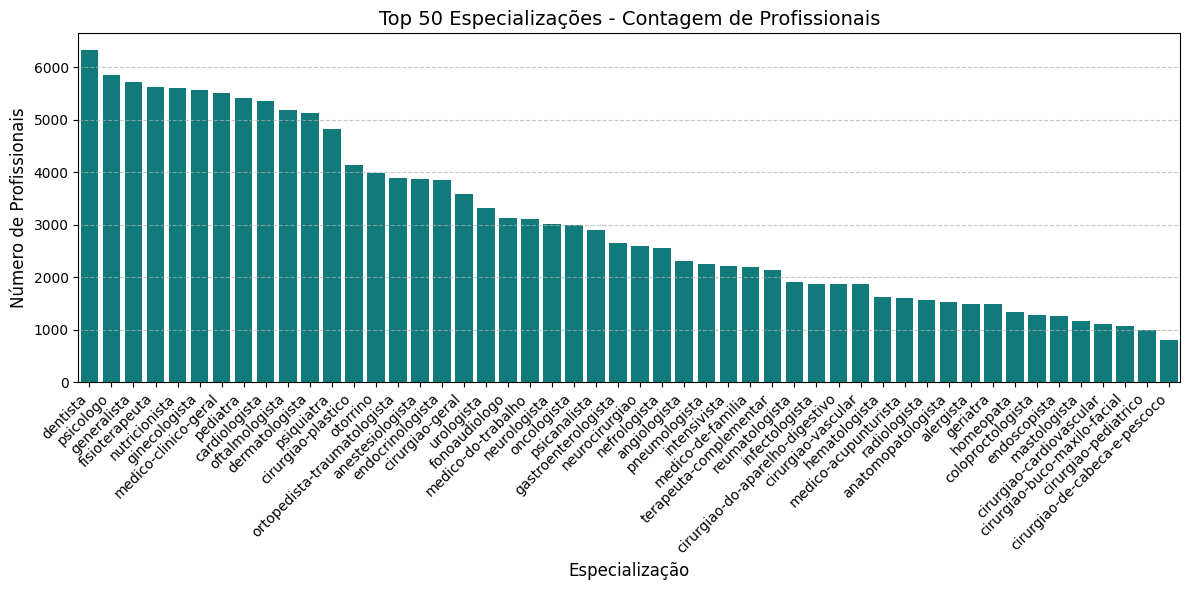

In [ ]:
# Conta o número de profissionais por especialização
contagem_especializacoes = df['specialization'].value_counts().nlargest(50)

# Cria um DataFrame auxiliar para visualização
df_plot = pd.DataFrame({
    'Especialização': contagem_especializacoes.index,
    'Número de Profissionais': contagem_especializacoes.values
})

# Cria o gráfico de barras com cor única
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Especialização', y='Número de Profissionais', color='darkcyan')

# Personalizações do gráfico
plt.title('Top 50 Especializações - Contagem de Profissionais', fontsize=14)
plt.xlabel('Especialização', fontsize=12)
plt.ylabel('Número de Profissionais', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Os profissionais não médicos (formados em outras especialidades diferentes das médicas) se destacam em número no banco de dados. Por exemplo: dentistas, psicologos, fisioterapeutas e nutricionistas).

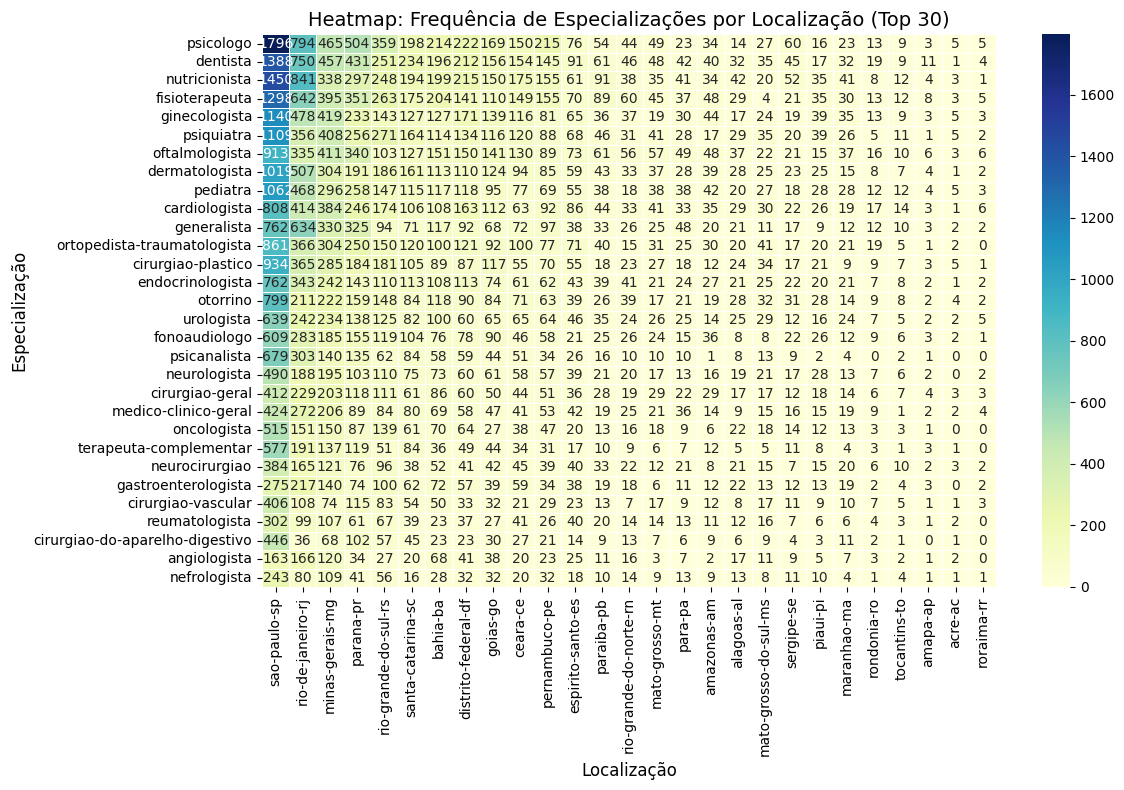

In [ ]:
# cria heatmap localização versus especialização
# Filtra colunas e remove valores ausentes
df_filtrado = df[['region', 'specialization']].dropna()

# Seleciona as 30 localizações e especializações mais comuns
top_locations = df_filtrado['region'].value_counts().nlargest(30).index
top_specializations = df_filtrado['specialization'].value_counts().nlargest(10).index

df_top = df_filtrado[
    df_filtrado['region'].isin(top_locations) &
    df_filtrado['specialization'].isin(top_specializations)
]



# Cria uma tabela de frequência cruzada
tabela = pd.crosstab(df_filtrado['specialization'], df_filtrado['region'])

# Seleciona as 30 especializações e localizações mais comuns
especialidades_top = tabela.sum(axis=1).nlargest(30).index
localizacoes_top = tabela.sum(axis=0).nlargest(30).index
tabela_reduzida = tabela.loc[especialidades_top, localizacoes_top]

# Cria o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tabela_reduzida, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

plt.title('Heatmap: Frequência de Especializações por Localização (Top 30)', fontsize=14)
plt.xlabel('Localização', fontsize=12)
plt.ylabel('Especialização', fontsize=12)
plt.tight_layout()

Percebe-se que na amostra do dataset, há maior quantidade de profissionais registrados na região sudeste.

# Analisando os valores das consultas

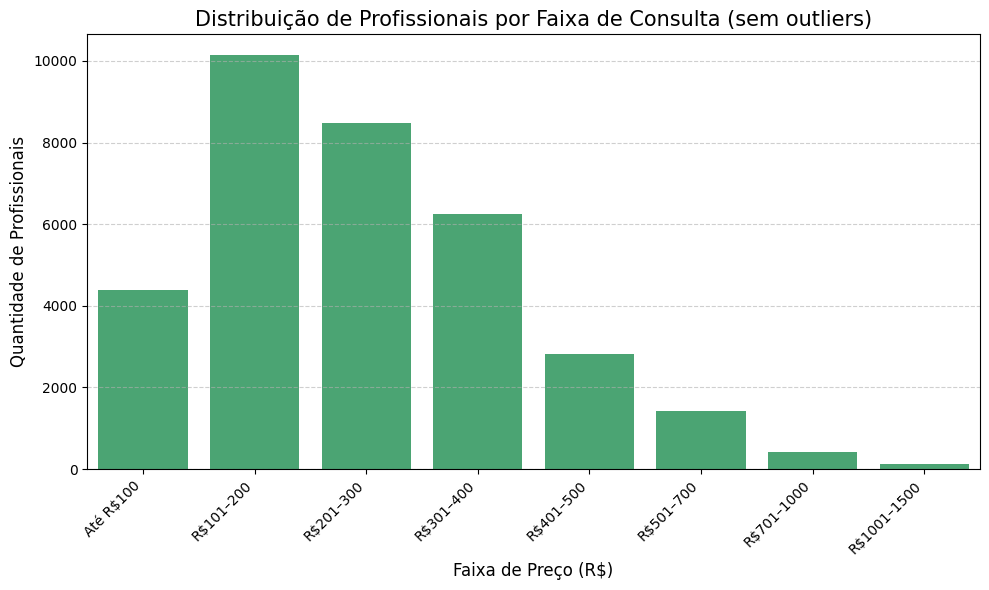

In [ ]:
# Converte a coluna 'price' para numérico e remove valores ausentes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_price = df['price'].dropna()

# Filtra valores abaixo de R$1.500
df_price_filtrado = df_price[df_price <= 1500]

# Define faixas de preço mais enxutas
faixas = [0, 100, 200, 300, 400, 500, 700, 1000, 1500]
labels = ['Até R$100', 'R$101–200', 'R$201–300', 'R$301–400', 'R$401–500',
          'R$501–700', 'R$701–1000', 'R$1001–1500']

# Agrupa os preços por faixa
df_price_faixa = pd.cut(df_price_filtrado, bins=faixas, labels=labels, include_lowest=True)

# Conta frequência por faixa
faixa_freq = df_price_faixa.value_counts().sort_index()

# Monta DataFrame auxiliar
faixa_df = pd.DataFrame({
    'Faixa de Preço': faixa_freq.index,
    'Número de Profissionais': faixa_freq.values
})

plt.figure(figsize=(10, 6))
sns.barplot(data=faixa_df, x='Faixa de Preço', y='Número de Profissionais', color='mediumseagreen')

plt.title('Distribuição de Profissionais por Faixa de Consulta (sem outliers)', fontsize=15)
plt.xlabel('Faixa de Preço (R$)', fontsize=12)
plt.ylabel('Quantidade de Profissionais', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

O gráfico acima visa analisar a distribuição dos preços das consultas. Foram retirados os valores acima de R$ 1.500,00 e identificadas faixas para melhor apresentação.

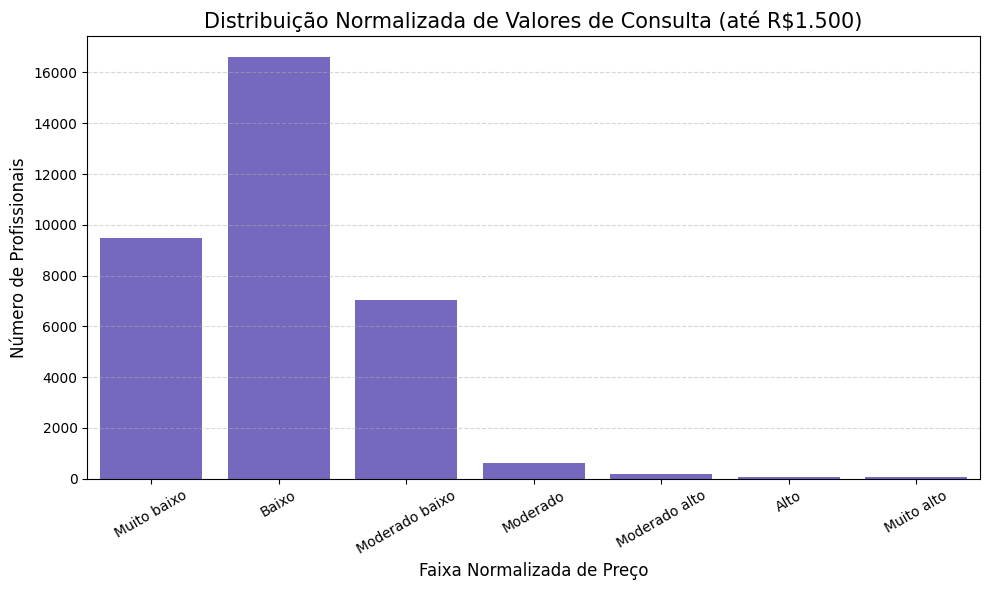

In [ ]:
# Converte coluna 'price' para numérico e remove ausentes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_price = df['price'].dropna()

# Filtra valores de até R$1.500
df_price_filtrado = df_price[df_price <= 1500]

# Aplica Min-Max Scaling
scaler = MinMaxScaler()
df_price_norm = scaler.fit_transform(df_price_filtrado.values.reshape(-1, 1)).flatten()

# Define faixas normalizadas
bins = [0.00, 0.10, 0.25, 0.40, 0.55, 0.70, 0.85, 1.00]
labels = ['Muito Baixo', 'Baixo', 'Moderado baixo', 'Moderado',
          'Moderado alto', 'Alto', 'Muito alto']

# Agrupa os valores normalizados em faixas
faixas_norm = pd.cut(df_price_norm, bins=bins, labels=labels, include_lowest=True)

# Conta número de profissionais por faixa
faixa_freq = faixas_norm.value_counts().sort_index()

# Prepara dataframe
faixa_df = pd.DataFrame({
    'Faixa Normalizada': faixa_freq.index,
    'Número de Profissionais': faixa_freq.values
})

# Cria gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=faixa_df, x='Faixa Normalizada', y='Número de Profissionais', color='slateblue')

plt.title('Distribuição Normalizada de Valores de Consulta (até R$1.500)', fontsize=15)
plt.xlabel('Faixa Normalizada de Preço', fontsize=12)
plt.ylabel('Número de Profissionais', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A normalização altera a apresentação ligeiramente, tornando mais clara a apresentação. A grande maioria dos profissionais cobram entre 100,00 e 400,00 (olhando para os dois gráficos anteriores). Foi criada uma classificação de muito baixo para muito alta para ser mais ilustrativa.

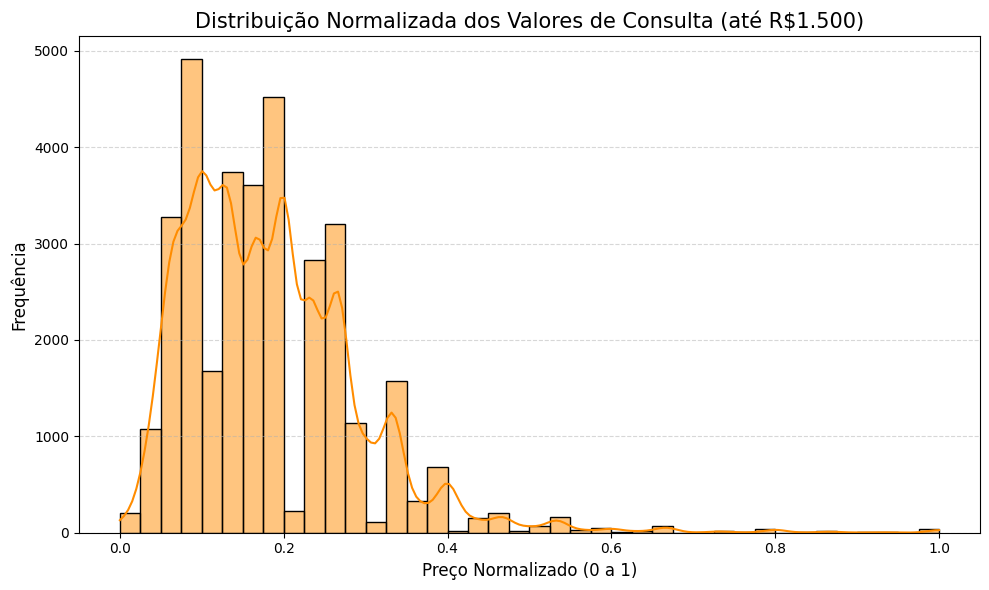

In [ ]:
# Converte e filtra preços
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_price = df['price'].dropna()
df_price_filtrado = df_price[df_price <= 1500]

# Normaliza com Min-Max
scaler = MinMaxScaler()
df_price_norm = scaler.fit_transform(df_price_filtrado.values.reshape(-1, 1)).flatten()

# Histograma + KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_price_norm, bins=40, kde=True, color='darkorange')

plt.title('Distribuição Normalizada dos Valores de Consulta (até R$1.500)', fontsize=15)
plt.xlabel('Preço Normalizado (0 a 1)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O grafico foi baseado nos preços das consultas. A fim de evitar os outliers foram considerados apenas os valores inferiores a R$ 1.500,00. Os preços de consulta seguem uma distribuição assimétrica à direita — ou seja, muitos profissionais com preços mais baixos e poucos com preços bem elevados. O gráfico se apresenta desta forma mesmo excluindo-se valores elevados e normalizando os dados.

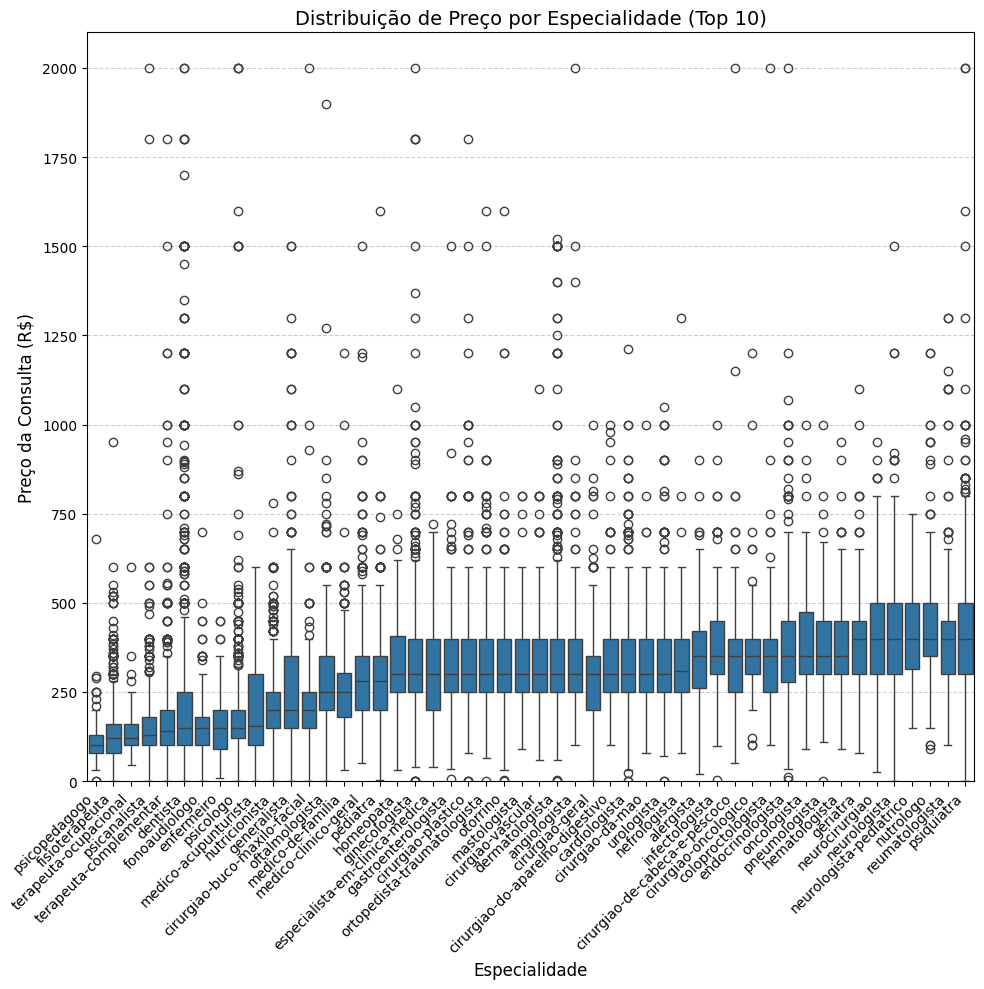

In [ ]:
# grafico bloxplot com os custos por profissão
# Filtra colunas relevantes e remove valores ausentes
df_filtrado = df[['specialization', 'price']].dropna()
df_filtrado['price'] = pd.to_numeric(df_filtrado['price'], errors='coerce')
df_filtrado = df_filtrado.dropna()

# Seleciona as 10 especialidades mais comuns
top_specializations = df_filtrado['specialization'].value_counts().nlargest(50).index
df_top = df_filtrado[df_filtrado['specialization'].isin(top_specializations)]

# Ordena especialidades pela mediana do preço da consulta
ordem = df_top.groupby('specialization')['price'].median().sort_values().index

# Cria o boxplot preço versus especialidade
plt.figure(figsize=(10, 10))
sns.boxplot(
    data=df_top,
    x='specialization',
    y='price',
    order=ordem,
    )

plt.ylim(0, 2100)  # Ajuste aqui conforme a faixa de preços que deseja destacar
plt.title('Distribuição de Preço por Especialidade (Top 10)', fontsize=14)
plt.xlabel('Especialidade', fontsize=12)
plt.ylabel('Preço da Consulta (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Pelo boxplot acima, percebe-se que o valor das consultas para as profissões não médicas têm medianas menores quando comparadas às profissções médicas.

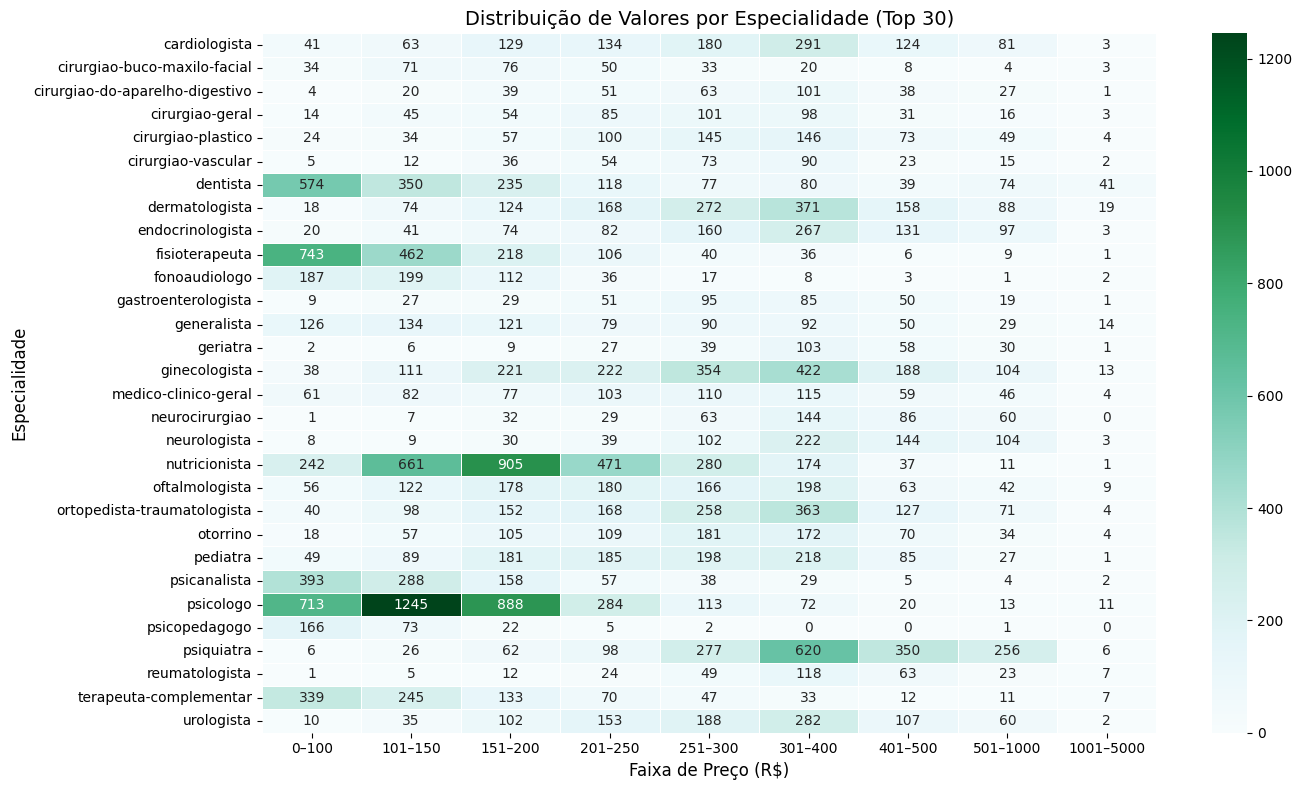

In [ ]:
# Converte e filtra os dados
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_esp = df.dropna(subset=['price', 'specialization']).copy()  # ✔️ cópia segura

# Agrupa por faixas
bins = [0, 100, 150, 200, 250, 300, 400, 500, 1000, 5000]
labels = ['0–100', '101–150', '151–200', '201–250', '251–300', '301–400',
          '401–500', '501–1000', '1001–5000']
df_esp.loc[:, 'faixa_preco'] = pd.cut(df_esp['price'], bins=bins, labels=labels)

# Seleciona as 30 especialidades mais comuns
top_esp = df_esp['specialization'].value_counts().nlargest(30).index
df_esp_top = df_esp[df_esp['specialization'].isin(top_esp)]

# Tabela de contagem cruzada
tabela_esp = pd.crosstab(df_esp_top['specialization'], df_esp_top['faixa_preco'])

# Gráfico heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(tabela_esp, annot=True, fmt='d', cmap='BuGn', linewidths=0.5)
plt.title('Distribuição de Valores por Especialidade (Top 30)', fontsize=14)
plt.xlabel('Faixa de Preço (R$)', fontsize=12)
plt.ylabel('Especialidade', fontsize=12)
plt.tight_layout()
plt.show()

Esse  heatmap oferece uma visão rica: quais especialidades tendem a cobrar mais ou menos.


# Analise das avaliações

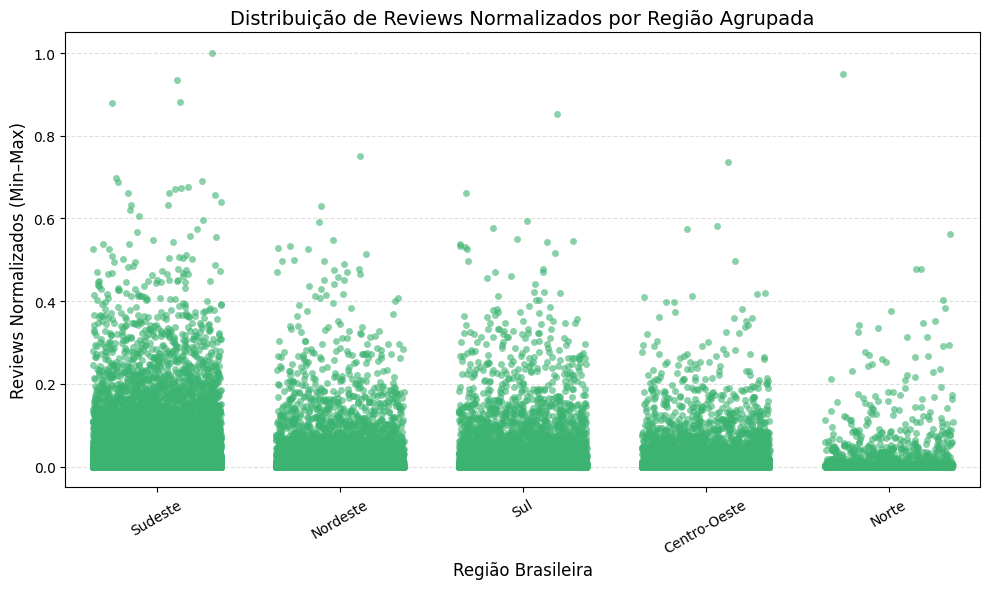

In [ ]:
# Mapeamento de regiões
regiao_map = {
    'sao-paulo-sp': 'Sudeste', 'rio-de-janeiro-rj': 'Sudeste', 'minas-gerais-mg': 'Sudeste', 'espirito-santo-es': 'Sudeste',
    'parana-pr': 'Sul', 'santa-catarina-sc': 'Sul', 'rio-grande-do-sul-rs': 'Sul',
    'bahia-ba': 'Nordeste', 'pernambuco-pe': 'Nordeste', 'ceara-ce': 'Nordeste', 'maranhao-ma': 'Nordeste',
    'paraiba-pb': 'Nordeste', 'piaui-pi': 'Nordeste', 'sergipe-se': 'Nordeste', 'alagoas-al': 'Nordeste', 'rio-grande-do-norte-rn': 'Nordeste',
    'distrito-federal-df': 'Centro-Oeste', 'goias-go': 'Centro-Oeste', 'mato-grosso-mt': 'Centro-Oeste', 'mato-grosso-do-sul-ms': 'Centro-Oeste',
    'amazonas-am': 'Norte', 'para-pa': 'Norte', 'acre-ac': 'Norte', 'amapa-ap': 'Norte', 'rondonia-ro': 'Norte',
    'roraima-rr': 'Norte', 'tocantins-to': 'Norte'
}

# Aplica o mapeamento de região
df['region_group'] = df['region'].map(regiao_map)

# Converte coluna reviews
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Filtra dados válidos
df_scatter = df.dropna(subset=['reviews', 'region_group']).copy()

# Aplica Min-Max Scaling com .loc para evitar o warning
scaler = MinMaxScaler()
df_scatter.loc[:, 'reviews_norm'] = scaler.fit_transform(df_scatter[['reviews']])

# Cria gráfico com cor única (sem palette)
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_scatter,
              x='region_group',
              y='reviews_norm',
              jitter=0.35,
              alpha=0.6,
              color='mediumseagreen',  # ✔️ evita FutureWarning
              dodge=False)

plt.title('Distribuição de Reviews Normalizados por Região Agrupada', fontsize=14)
plt.xlabel('Região Brasileira', fontsize=12)
plt.ylabel('Reviews Normalizados (Min–Max)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

É perceptível que a Região sudeste tem maior quantidade de avaliações. Neste gráfico agrupou-se as regiões (estados) do dataset em macroregiões (estados).

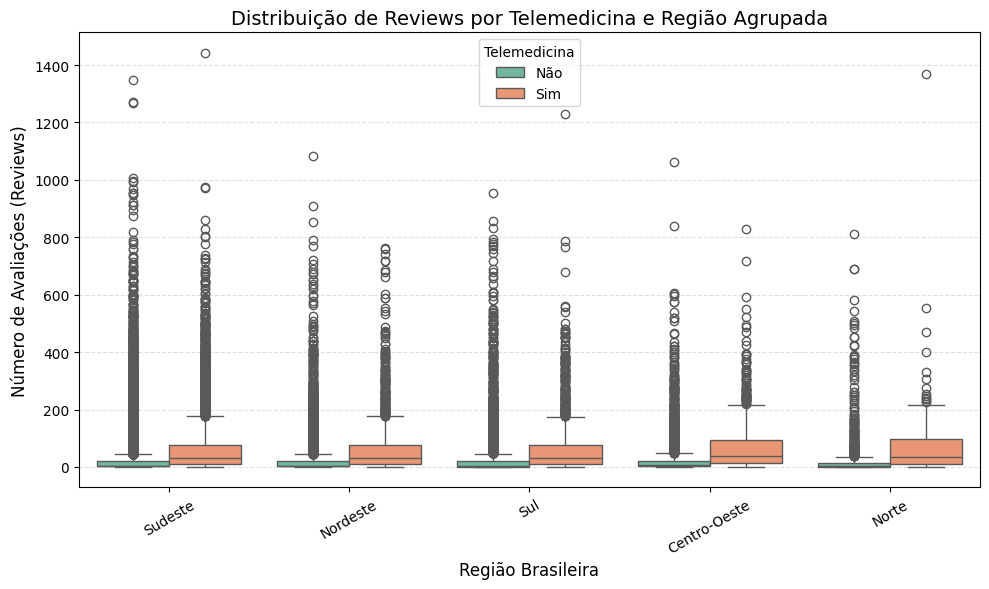

In [ ]:
# Cria o boxplot e captura o objeto Axes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_validos,
    x='region_group',
    y='reviews',
    hue='telemedicine',
    hue_order=[0.0, 1.0],   # Garante a ordem coerente: 0 = Não, 1 = Sim
    palette='Set2'          # Paleta consistente e suave
)

# Ajusta a legenda com rótulos corretos
ax.legend_.set_title("Telemedicina")
labels_legenda = ['Não', 'Sim']
for texto, novo_label in zip(ax.legend_.texts, labels_legenda):
    texto.set_text(novo_label)

# Personalização visual
plt.title('Distribuição de Reviews por Telemedicina e Região Agrupada', fontsize=14)
plt.xlabel('Região Brasileira', fontsize=12)
plt.ylabel('Número de Avaliações (Reviews)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Analisando o numero de avaliações comparando com a disponibilidade de telemedicina por região, aparentemente não há uma região que ofereça mais a telemedicina.

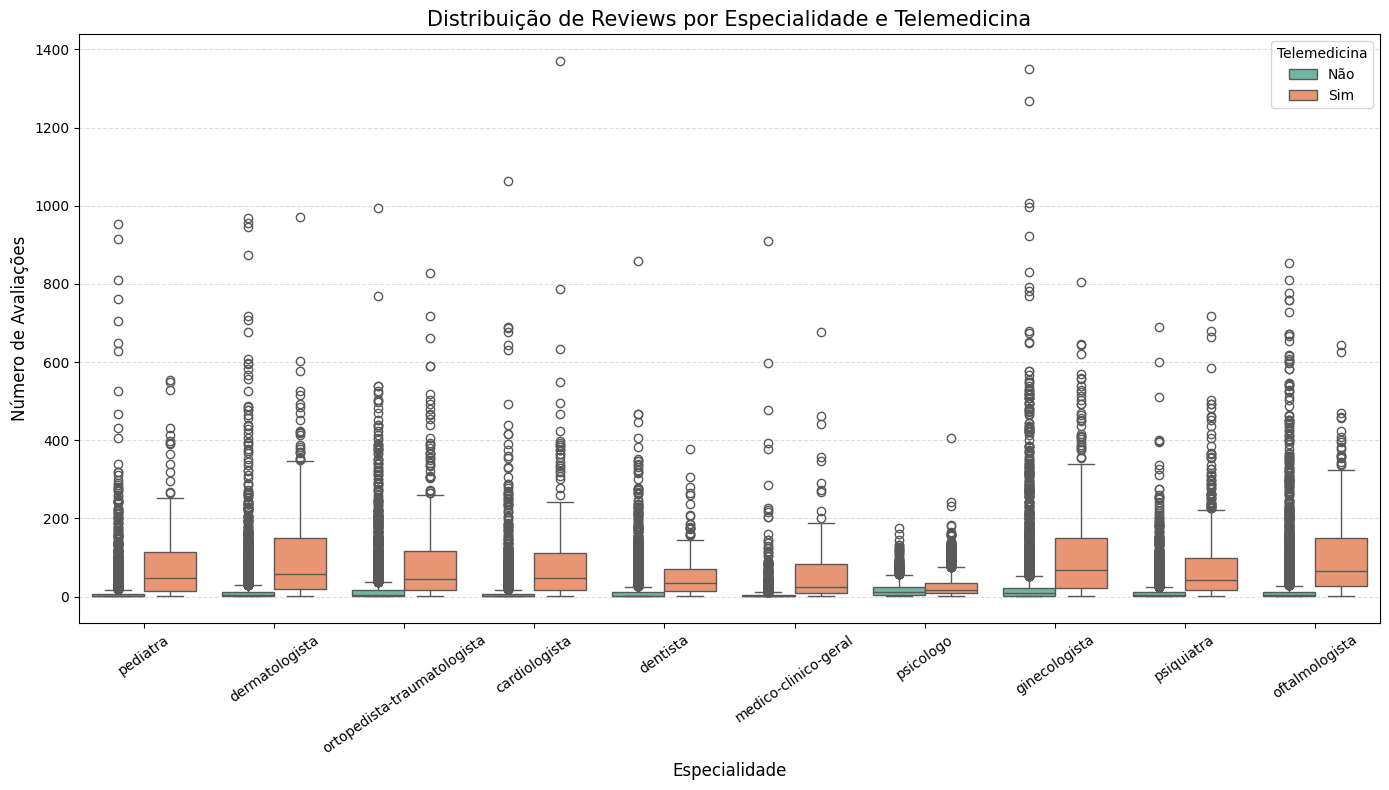

In [ ]:
# Prepara os dados
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['telemedicine'] = pd.to_numeric(df['telemedicine'], errors='coerce')
df_tm_esp = df.dropna(subset=['reviews', 'specialization', 'telemedicine'])

# Filtra especializações mais comuns
top_esp = df_tm_esp['specialization'].value_counts().nlargest(10).index
df_tm_esp_top = df_tm_esp[df_tm_esp['specialization'].isin(top_esp)]
df_tm_esp_top = df_tm_esp_top[df_tm_esp_top['telemedicine'].isin([0.0, 1.0])]

# Cria o gráfico e captura objeto Axes
plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    data=df_tm_esp_top,
    x='specialization',
    y='reviews',
    hue='telemedicine',
    hue_order=[0.0, 1.0],         # Garante ordem correta
    palette='Set2'                # Aplica paleta visual coerente
)

# Corrige a legenda para refletir a paleta
ax.legend_.set_title("Telemedicina")
legendas = ['Não', 'Sim']        # Valores correspondem a 0.0 e 1.0
for texto, nova_legenda in zip(ax.legend_.texts, legendas):
    texto.set_text(nova_legenda)

# Personalização visual
plt.title('Distribuição de Reviews por Especialidade e Telemedicina', fontsize=15)
plt.xlabel('Especialidade', fontsize=12)
plt.ylabel('Número de Avaliações', fontsize=12)
plt.xticks(rotation=35)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Fazendo a mesma análise por especialidade (usando as com maior quantidade de profissionais), aparentemente não há uma profissão que ofereça mais a telemedicina.

Logo, com base nos dois últimos gráficos seria possível afirmar apenas que aqueles que oferecem telemedicina, têm um maior número de avaliações.

<Figure size 2000x800 with 0 Axes>

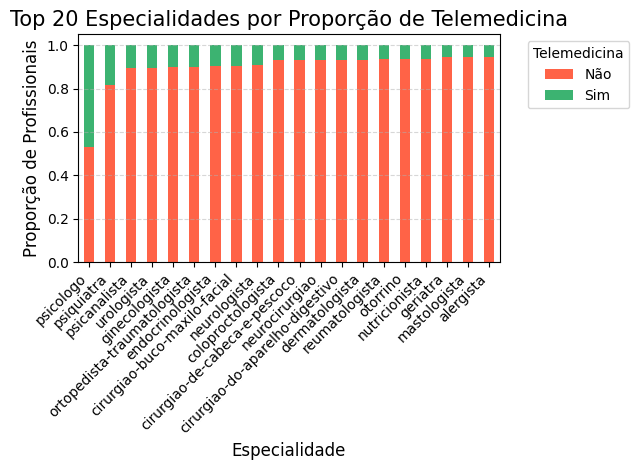

In [ ]:
# Converte telemedicina para numérico
df['telemedicine'] = pd.to_numeric(df['telemedicine'], errors='coerce')

# Filtra dados válidos
df_validos = df.dropna(subset=['telemedicine', 'specialization']).copy()

# Mantém as 50 maiores para considerar amostra mais ampla antes de ordenação
top_esp = df_validos['specialization'].value_counts().nlargest(50).index
df_top = df_validos[df_validos['specialization'].isin(top_esp)]

# Conta por especialidade e telemedicina (0.0 = não, 1.0 = sim)
contagem = df_top.groupby(['specialization', 'telemedicine']).size().unstack(fill_value=0)

# Calcula proporção por especialidade
proporcao = contagem.div(contagem.sum(axis=1), axis=0)

# Ordena pela proporção decrescente de profissionais com telemedicina
proporcao_ordenada = proporcao.sort_values(by=1.0, ascending=False).head(20)

# Gera gráfico
plt.figure(figsize=(20, 8))
proporcao_ordenada.plot(kind='bar', stacked=True, color=['tomato', 'mediumseagreen'])

plt.title('Top 20 Especialidades por Proporção de Telemedicina', fontsize=15)
plt.xlabel('Especialidade', fontsize=12)
plt.ylabel('Proporção de Profissionais', fontsize=12)
plt.legend(title='Telemedicina', labels=['Não', 'Sim'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Entretando quando se relaciona apenas a profissão com a oferta de telemedicina, sobressaem a psicologia, psiquiatria e psicanálise.

# Pré-Processamento de Dados
O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Em alguns dos graficos apresentados, foi necessária a normalização e redução de alguns valores outliers. Será feito o pré-processamento para facilitar a análise e para que o banco de dados esteja mais adequado para emprego em algoritmo.


**Feature Selection:**


In [ ]:
# Seleciona apenas as colunas desejadas
colunas_desejadas = ['title', 'city1', 'city2', 'region', 'specialization', 'reviews', 'telemedicine', 'price']
df_ajustado = df[colunas_desejadas].copy()

# Visualiza as primeiras linhas para conferência
print(df_ajustado.head())

  title           city1           city2        region specialization  reviews  \
0   Dr.      SÃ£o Paulo       sao-paulo  sao-paulo-sp      alergista     5.00   
1  Dra.      SÃ£o Paulo       sao-paulo  sao-paulo-sp      alergista    41.00   
2  Dra.      SÃ£o Paulo       sao-paulo  sao-paulo-sp      alergista    19.00   
3  Dra.      SÃ£o Paulo       sao-paulo  sao-paulo-sp      alergista   114.00   
4  Dra.  Campina Grande  campina-grande    paraiba-pb      alergista   164.00   

   telemedicine  price  
0          0.00 800.00  
1          1.00 600.00  
2          0.00 490.00  
3          1.00 300.00  
4          1.00 350.00  


**Reduzir os extremos, retirando os outliers**





In [ ]:
# Converte colunas relevantes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['telemedicine'] = pd.to_numeric(df['telemedicine'], errors='coerce')

# Filtra colunas desejadas
colunas_desejadas = ['title', 'city1', 'city2', 'region', 'specialization', 'reviews', 'telemedicine', 'price']
df_limpo = df[colunas_desejadas].dropna().copy()

# Remove outliers usando IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Aplica o filtro de outliers nas colunas price e reviews
df_filtrado = remover_outliers(df_limpo, 'price')
df_filtrado = remover_outliers(df_filtrado, 'reviews')

# Visualiza resultado
print(df_filtrado.describe())

        reviews  telemedicine     price
count 16,067.00     16,067.00 16,067.00
mean      33.33          0.34    313.90
std       38.05          0.47    132.59
min        1.00          0.00      0.00
25%        5.00          0.00    200.00
50%       18.00          0.00    300.00
75%       48.00          1.00    400.00
max      163.00          1.00    700.00


**Normalizar os dados**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Converte os dados para tipo numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['telemedicine'] = pd.to_numeric(df['telemedicine'], errors='coerce')

# Filtra colunas desejadas e remove ausentes
colunas_desejadas = ['title', 'city1', 'city2', 'region', 'specialization', 'reviews', 'telemedicine', 'price']
df_limpo = df[colunas_desejadas].dropna().copy()

# Aplica Min-Max Scaling
scaler = MinMaxScaler()
df_normalizado = df_limpo.copy()  # Cópia para preservar original
df_normalizado[['price_norm', 'reviews_norm', 'telemedicine_norm']] = scaler.fit_transform(
    df_normalizado[['price', 'reviews', 'telemedicine']]
)

# Exibe resultado
print(df_normalizado[['title', 'region', 'specialization', 'price_norm', 'reviews_norm', 'telemedicine_norm']].head())

  title        region specialization  price_norm  reviews_norm  \
0   Dr.  sao-paulo-sp      alergista        0.00          0.00   
1  Dra.  sao-paulo-sp      alergista        0.00          0.03   
2  Dra.  sao-paulo-sp      alergista        0.00          0.01   
3  Dra.  sao-paulo-sp      alergista        0.00          0.08   
4  Dra.    paraiba-pb      alergista        0.00          0.11   

   telemedicine_norm  
0               0.00  
1               1.00  
2               0.00  
3               1.00  
4               1.00  


**Normalizar os dados**

In [ ]:
# Converte colunas relevantes para numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['telemedicine'] = pd.to_numeric(df['telemedicine'], errors='coerce')

# Seleciona colunas desejadas e remove ausentes
colunas = ['title', 'city1', 'city2', 'region', 'specialization', 'reviews', 'telemedicine', 'price']
df_padrao = df[colunas].dropna().copy()

# Aplica StandardScaler
scaler = StandardScaler()
df_padrao[['price_std', 'reviews_std', 'telemedicine_std']] = scaler.fit_transform(
    df_padrao[['price', 'reviews', 'telemedicine']]
)

# Visualiza os dados padronizados
print(df_padrao[['specialization', 'region', 'price_std', 'reviews_std', 'telemedicine_std']].head())

  specialization        region  price_std  reviews_std  telemedicine_std
0      alergista  sao-paulo-sp       0.01        -0.55             -0.75
1      alergista  sao-paulo-sp       0.00        -0.19              1.34
2      alergista  sao-paulo-sp      -0.00        -0.41             -0.75
3      alergista  sao-paulo-sp      -0.01         0.53              1.34
4      alergista    paraiba-pb      -0.01         1.02              1.34


# **CONCLUSÕES:**


Todos as análises feitas necessitaram de tratamento, em que pese o dataset ser bem estruturado e organizado.
A análise exploratória mostrou características e relações importantes para entender a amostra presente no dataset. Os diversos gráficos facilitaram sobremaneira a análise.

Identifica-se claramente que a maioria dos profissionais cadastrados no Doctoralia estão localizados no sudeste, seguidos da região sul. Entretanto, não é possível, com os dados disponíveis, identificar o porquê dessa concentração.

Se destaca a  maior disponibilidade de profissionais de saúde não médicos (psicólogos, dentistas, nutricionistas e fisioterapeutas). Em interpretação livre deste autor, considerei não médico aquele profissional que não cursou medicina.

Não foi possível validar as hipóteses iniciais.

1. Não foi identificado nenhum tipo de cluster de especialidade por área geográfica.
2. Não foi identificado um cluster com maior disponibilidade de telemedicina, entretanto, de forma inesperada foi identificado que a oferta de telemedicina pode levar a um maior número de avaliações por profissional.
3. Foi identificado um cluster de telemedicina (psicólogos + psiquiatras + psicoanalistas).

É preciso ressaltar que as conclusões obtidas no decorrer da análise serve apenas para a amostra do dataset. Podem haver muitos outros profissionais de saúde que não estão na plataforma.